# FINAL NOTEBOOK

### Introduction
The main goal of the project is to analyze the best neighborhood in Pittsburgh to set up a Ghostbusting business. In order to bust ghosts, you need a neighborhood that is packed full of ghosts, so we had to figure out which neighborhood would have the most. The three metrics we felt accurately displayed spookiness among the neighborhoods were Cemetery Outlines, Vacant Houses, and Older Houses. These are all kind of characteristics 
<br /> The original plan we were going to use for the project was the best neighborhood for the Teenage Mutant Ninja Turtles to live in, but we ran into a big problem - no datasets accurately displayed the number of pizza shops in each neighborhood. Pizza is vital to the livelihood of the Ninja Turtles, so without pizza we felt we could not faithfully portray this metric. However, as we looked at all the datasets available on the WPRDC, we decided to keep the 80s pop culture theme alive and arrived at the Ghostbusters.


## Metric #1: Vacant Addresses - Shiv

For the analysis of the best Pittsburgh neighborhood for being a Ghostbuster, one of the datasets we chose to analyze was vacant addresses per neighborhood. This was chosen under the assumption that there is more likely to be ghosts in abandonded and empty houses.

In [4]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
hoods = pd.read_csv("Hoods.csv", sep=",")
hoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.068796e+07,19600.573085
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223202e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.133208e+07,21174.473326
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.739570e+06,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,8.743618e+06,13811.917169
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.755059e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.754935e+07,18197.745741
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522062e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,2.522420e+07,26390.549314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,2.339339e+07,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,2.338689e+07,31964.844864
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,3.683600e+06,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,3.683820e+06,9978.225999
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,6.409852e+06,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,6.425358e+06,25260.814467
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,1.027890e+07,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.027920e+07,16308.247349


Above I imported the necessary libraries to use for my data analysis and then read in the neighborhood.csv file which contains the all the Pittsburgh neighborhoods.

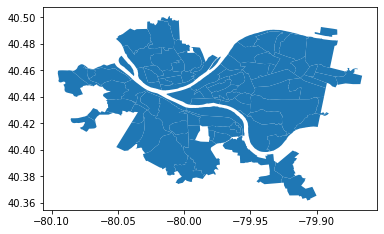

In [6]:
map = geopandas.read_file("Neighborhoods_.shp")
map.plot()

I began by using the geopandas library that I imported earlier to produce a blank visual map of Pittsburgh neighborhoods which will be filled in with the data analyzed in the following steps.

In [7]:
vacancies = geopandas.read_file("Vacant_Property_Rates.shp") # read in the shapefile
vacancies

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,TRACTCENUM,GEOIDNUM,Geoid_1,Tract1,ReslBuild,ResVac,pervacprop,geometry
0,42,003,431100,42003431100,4311,Census Tract 4311,431100.0,4.200343e+10,4.200343e+10,431100,1877,47,0.025040,"POLYGON ((-80.04602 40.49487, -80.04553 40.494..."
1,42,003,432300,42003432300,4323,Census Tract 4323,432300.0,4.200343e+10,4.200343e+10,432300,1309,27,0.020626,"POLYGON ((-80.06160 40.50581, -80.06160 40.505..."
2,42,003,563800,42003563800,5638,Census Tract 5638,563800.0,4.200356e+10,4.200356e+10,563800,1727,11,0.006369,"POLYGON ((-80.12156 40.53626, -80.11346 40.533..."
3,42,003,563300,42003563300,5633,Census Tract 5633,563300.0,4.200356e+10,4.200356e+10,563300,657,0,0.000000,"POLYGON ((-80.13451 40.58823, -80.13282 40.587..."
4,42,003,451104,42003451104,4511.04,Census Tract 4511.04,451104.0,4.200345e+10,4.200345e+10,451104,1410,0,0.000000,"POLYGON ((-80.24876 40.55465, -80.24825 40.554..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,42,003,980400,42003980400,9804,Census Tract 9804,980400.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-80.01394 40.48431, -80.01385 40.484..."
398,42,003,980500,42003980500,9805,Census Tract 9805,980500.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-79.93404 40.43771, -79.93404 40.437..."
399,42,003,980300,42003980300,9803,Census Tract 9803,980300.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-79.90137 40.42724, -79.90172 40.427..."
400,42,003,981000,42003981000,9810,Census Tract 9810,981000.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-79.93457 40.47217, -79.93481 40.472..."


By reading in the shapefile, I was able to first gain access to the dataset that contains the total vacancies per neighborhood.

In [8]:
vacantAddresses = hoods.merge(vacancies, how='left', left_on='tractce10', right_on='TRACTCE')
vacantAddresses = vacantAddresses[['hood', 'ResVac']]
vacantAddresses

,hood,ResVac
0,Chateau,0.0
1,Summer Hill,9.0
2,Northview Heights,21.0
3,Spring Hill-City View,41.0
4,Perry South,119.0
...,...,...
85,Overbrook,26.0
86,Chartiers City,36.0
87,Esplen,189.0
88,Ridgemont,35.0


In this step I took the two datasets and had to merge them in order to filter out only the Pittsburgh neighborhoods. I filtered using the tractce from both. From this point onward I had one dataset that contains the necessary information for my analysis.

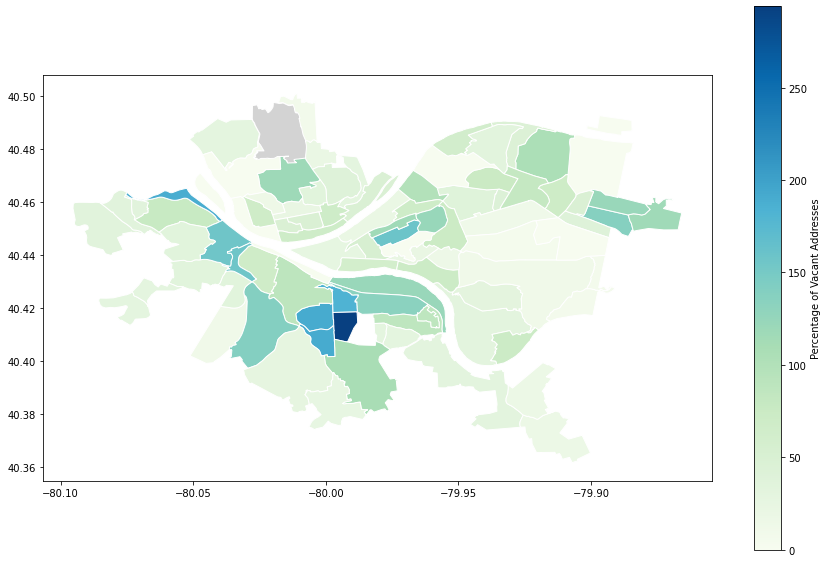

In [9]:
vacantMap = map.merge(vacantAddresses, how = 'left', left_on = 'hood', right_on = 'hood')
vacantMap.plot(column='ResVac',
                cmap = 'GnBu',
                  edgecolor = 'white',
                  legend = True,
                  legend_kwds = {'label': 'Percentage of Vacant Addresses'},
                  figsize = (15, 10),
                  missing_kwds = {'color': 'lightgrey'})

Here is a map of the neighborhoods with the number of vacant houses represented by color.

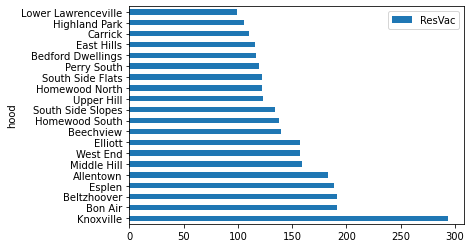

In [10]:
vacantAddresses = vacantAddresses.sort_values('ResVac', ascending=False)
vacantAddresses.head(20).plot.barh(x='hood')

With this merged dataset that contains the necessary filtered information, I was able to use geopandas to essentially "fill in" the blank Pittsburgh neighborhood map with a heat map of vacant addresses. Finally, I was able to use matplotlib to create a bar graph of the top 20 neighborhoods in terms of total number of vacant addresses. 

## Metric #2: Cemeteries - Julianne

More cemeteries could probably be linked to more ghosts, so we decided to use this to gage the best neighborhood for the Ghostbusters.  
I looked at the area of the cemetery per neighborhood.

In [11]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
%matplotlib inline

So first let's look at the cemetery data. It shows all the cemeteries in Allegheny County, and their areas.

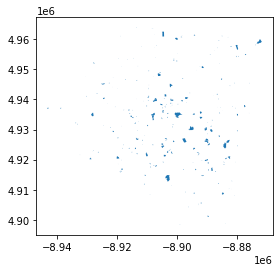

In [12]:
cemetery = geopandas.read_file('Cemeteries.shp') # read in the shapefile
cemetery.plot() # plot the geopandas dataframe

In [13]:
cemetery.head()

,FID,PERIMETER,NAME,ACRES,SHAPE_Leng,SHAPE_Area,geometry
0,1,1146.338989,Mount Pleasant Cemetery,1.826,460.873252,12858.283095,"POLYGON ((-8913536.939 4963852.907, -8913530.6..."
1,2,426.527710,Reservoir Cemetery In Pine Twp,0.276,171.523029,1946.327588,"POLYGON ((-8908720.890 4963641.147, -8908722.0..."
2,3,1135.046021,West Union Cemetery,1.571,456.342863,11065.559710,"POLYGON ((-8908127.774 4963656.607, -8908058.9..."
3,4,11221.629883,Holy Savior Catholic Cemetery,125.665,4514.258494,884589.543348,"POLYGON ((-8904408.952 4962512.672, -8904377.5..."
4,5,597.789673,Clover Lane Cemetery,0.455,240.490123,3204.759739,"POLYGON ((-8907459.908 4961571.845, -8907455.1..."


This doesn't show us that much, but if we can use it in relation to another map, maybe we can gain more information.  
Sadly the cemetery data doesn't help us much. We only have the acres, perimeter, name and shape information.  

After trying to merge the neighborhood and cemetery files, I discovered they use different coordinate systems to create their maps, so I can't work with them together just yet. So I had to find another file to use.

I found a database of all the blocks in in Southwestern PA. It uses the same coordinate system as the cemetery data, so we could work with these two combined. But first we should narrow down the map to the right area. 

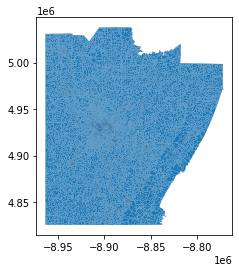

In [14]:
block = geopandas.read_file('BlockCodes2016.shp')
block.plot()

In [15]:
block.head(1)

,OBJECTID_1,OBJECTID_2,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,...,Pgh_CityCo,Pgh_Police,Pgh_FireDi,Pgh_DPW_Di,Pgh_Ward,Distance,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,440,42,003,516100,1000,420035161001000,Block 1000,G5040,...,0,0,None,0,0,0.0,0.006539,935.966032,7786.056875,"POLYGON ((-8892863.053 4929630.006, -8892857.5..."


The block file has multiple location ids and a GEOID which the neighborhood file also has, so we will focus on tractce10 and geoid10 columns to narrow down the file.  
The tractce is the most specific part of the geoid, so that will be most important.

In [16]:
neighbor = geopandas.read_file('Neighborhoods_.shp')
neighbor.head(1)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,temp,Shape__Are,Shape__Len,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."


In [17]:
block['GEOID10'] = block['GEOID10'].astype(int)
querymask = block['GEOID10']<420040000000000
                 #420035161001000

All the geoids in Pittsburgh Neighborhoods and Allegheny County are less than 420040000000000, so I filtered out the blocks that weren't in a geoid less than that

In [18]:
block_filtered = block[querymask]
block_filtered.head(3)

,OBJECTID_1,OBJECTID_2,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,...,Pgh_CityCo,Pgh_Police,Pgh_FireDi,Pgh_DPW_Di,Pgh_Ward,Distance,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,440,42,003,516100,1000,420035161001000,Block 1000,G5040,...,0,0,None,0,0,0.0,0.006539,935.966032,7786.056875,"POLYGON ((-8892863.053 4929630.006, -8892857.5..."
1,2,2,439,42,003,516100,1007,420035161001007,Block 1007,G5040,...,0,0,None,0,0,0.0,0.002721,348.917436,6992.354496,"POLYGON ((-8893440.022 4929354.169, -8893436.3..."
2,3,3,434,42,003,510000,1025,420035100001025,Block 1025,G5040,...,0,0,None,0,0,0.0,0.003951,518.625510,6620.278364,"POLYGON ((-8887324.797 4923905.993, -8887337.2..."


So now the map is just of Allegheny County

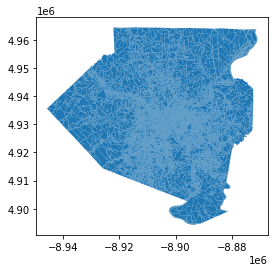

In [19]:
block_filtered.plot()

We can now use the tractce10. That is the most specific part of a geoid, so we could compare the ones in the neighborhood files to the ones in the block file. 

In [20]:
query = block_filtered['TRACTCE10'].astype(str).isin(neighbor['tractce10'].astype(str))
block_neighbor = block_filtered[query]
block_neighbor.head(3)

,OBJECTID_1,OBJECTID_2,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,...,Pgh_CityCo,Pgh_Police,Pgh_FireDi,Pgh_DPW_Di,Pgh_Ward,Distance,Shape_Leng,Shape_Le_1,Shape_Area,geometry
1287,1288,1288,1078,42,003,980000,1001,420039800001001,Block 1001,G5040,...,9,5,3-24,2,12,0.0,0.037120,4538.058360,595181.997811,"POLYGON ((-8892712.994 4937519.801, -8892712.8..."
1288,1289,1289,1491,42,003,130600,3032,420031306003032,Block 3032,G5040,...,9,5,3-19,2,13,0.0,0.000673,83.498815,513.556277,"POLYGON ((-8890962.050 4932351.060, -8890962.9..."
1295,1296,1296,1391,42,003,130200,2005,420031302002005,Block 2005,G5040,...,9,5,3-18,2,13,0.0,0.005534,653.441154,13332.367854,"POLYGON ((-8893908.566 4932994.937, -8893959.3..."


This is pretty good, we have all the blocks in the same region as the neighborhoods. But they are still separated as blocks, we need the regions to be connected as one area.   
We can use dissolve to do this.

In [21]:
block_ids = block_neighbor[['OBJECTID_1','TRACTCE10', 'Shape_Leng','Shape_Le_1','Shape_Area', 'geometry']]
tractce = block_ids.dissolve(by = 'TRACTCE10')
tractce['id'] = tractce.index
tractce.head()

,geometry,OBJECTID_1,Shape_Leng,Shape_Le_1,Shape_Area,id
TRACTCE10,,,,,,
010300,"POLYGON ((-8903238.252 4929184.224, -8903365.2...",1345,0.011448,1373.313708,83814.842782,010300
020100,"POLYGON ((-8905333.730 4929073.221, -8905344.5...",1356,0.003588,454.870832,12873.154790,020100
020300,"POLYGON ((-8904478.017 4930768.392, -8904489.5...",1464,0.004321,537.395626,11911.087429,020300
030500,"POLYGON ((-8902910.750 4929926.328, -8902922.3...",1902,0.003024,390.821464,6205.349478,030500
040200,"POLYGON ((-8901884.718 4929570.626, -8901959.3...",1350,0.007286,948.691413,31482.405181,040200


Below is the connected regions compared to the regions in the neighborhood file.

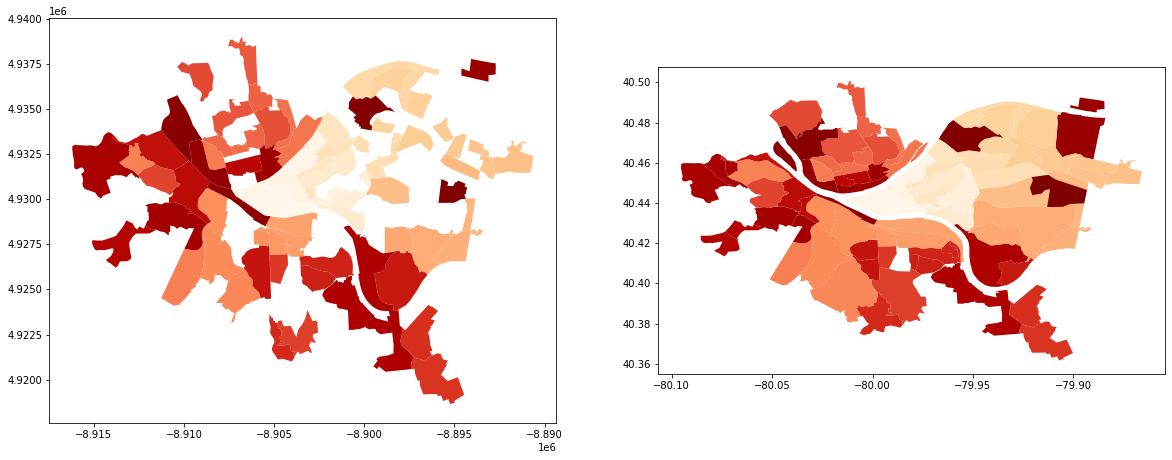

In [23]:
fig, axes = plt.subplots(figsize = (20,20), ncols=2)

tractce.plot(ax = axes[0], column = 'id', cmap = 'OrRd')

neighbor.plot(ax = axes[1], column = 'tractce10', cmap = 'OrRd')

That that we have the region of Pittsburgh, lets look at the cemeteries in this area.

(4918624.017720282, 4939020.98838301)

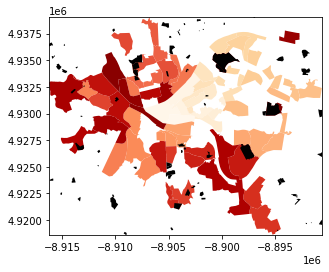

In [24]:
ax = tractce.plot(column = 'id',cmap = 'OrRd')

cemetery.plot(ax=ax, color = 'black')

minx, miny, maxx, maxy = tractce.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

Now that these maps line up, we can find the area of each cemetery in each region using 'intersection'. This allows us to see where the cemeteries intersect the regions, and add up the area of that intersection.

In [25]:
tractce['cem_area'] = 0
for row_neighbor in tractce.iterrows():
    for row_cem in cemetery.iterrows():
        intersection = row_neighbor[1]['geometry'].intersection(row_cem[1]['geometry'])
        if(intersection.area)> 0:
            row_id = row_neighbor[1].loc['id']
            tractce.loc[row_id,'cem_area'] += intersection.area

We can now map Pittsburgh by cemetery area!

Text(0.5, 1.0, 'Cemetary Area per tractce Region')

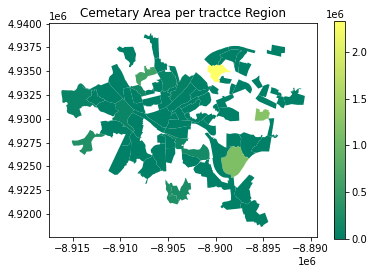

In [26]:
tractce.plot(column = 'cem_area', cmap = 'summer', legend = True)
plt.title('Cemetary Area per tractce Region')

However we have to remember that this is by REGION in the tractce numbers, not by neighborhood. So we need to narrow it down to neighborhood.  
Lets look at all the areas that have a cemetery area grater than 0

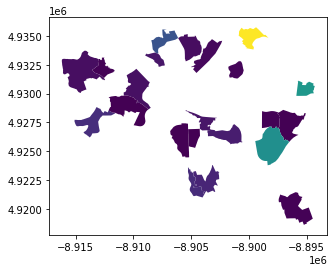

In [27]:
mask = tractce['cem_area']>0
tractce_big = tractce[mask]
tractce_big.plot(column = 'cem_area')

We can compare this to all the areas that correspond on the neighborhood map. I filtered all the neighborhoods that have the same tractce numbers

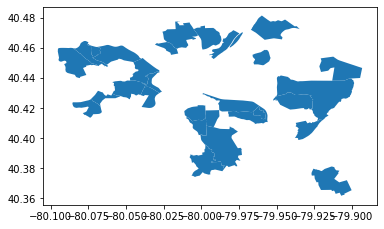

In [28]:
query = neighbor['tractce10'].isin(tractce_big['id'])
neighbor_big = neighbor[query]
neighbor_big.plot()

We can now compare the two and find which neighborhoods actually have the cemeteries in them. 

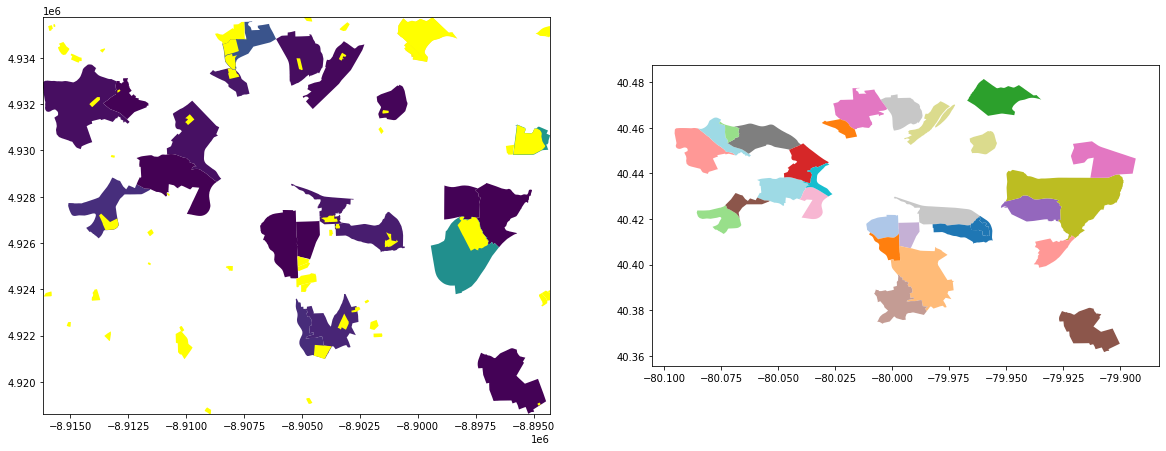

In [29]:
fig, axes = plt.subplots(figsize = (20,20), ncols=2)

ax = tractce_big.plot(ax = axes[0], figsize = (10,10), column = 'cem_area')
cemetery.plot(ax = ax, color = 'yellow')

minx, miny, maxx, maxy = tractce_big.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plot = neighbor_big.plot(ax = axes[1], figsize = (10,10), column = 'hood', cmap = 'tab20')

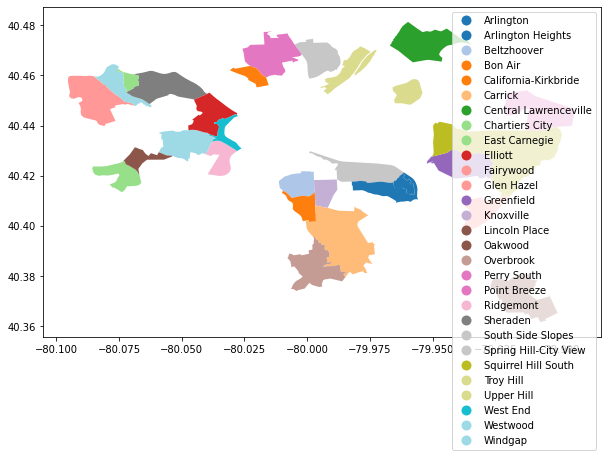

In [30]:
plot = neighbor_big.plot( figsize = (10,10), column = 'hood', cmap = 'tab20', label = 'hood', legend = True)

When we compare these maps, we can see that some regions are comprised of two neighborhood. I just manually checked whether the cemeteries (the yellow splotches) would appear in both neighborhood or only one in the tractce region.  
I made note of the neighborhoods that had no cemeteries in them, and removed those neighborhoods from the group.

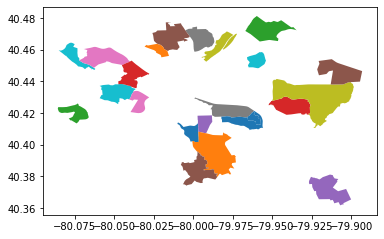

In [31]:
remove = ['Fairywood', 'Glen Hazel', 'Beltzhoover', 'Oakwood', 'Chartiers City', 'West End']
neighbor_filter = neighbor_big[~neighbor_big['hood'].isin(remove)]
neighbor_filter.plot(column = 'hood')

So now we have all the neighborhoods, that contain cemeteries. Now we need to merge these names with their areas. 

In [32]:
neighbor_filter['cem_area'] = 0
for row_neighbor in neighbor_filter.iterrows():
    for row_cem in tractce_big.iterrows():
        if(int(row_neighbor[1].loc['tractce10'])==int(row_cem[1].loc['id'])):
            area = row_cem[1].loc['cem_area']
            tractce = row_neighbor[1].loc['tractce10']
            row_id = neighbor_filter.loc[neighbor_filter['tractce10'] == tractce].index
            neighbor_filter.loc[row_id, 'cem_area'] = area

/opt/tljh/user/lib/python3.8/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


This code matches the tractce in the top neighborhoods to the tractce in the region/cemetery data.  
If their tractce matches, then we can add the cemetery area to that neighborhood. 

I now wanted to make a dataframe that has only the neighborhood name to the cemetery area.   
I added all the hood names to the dataframe, and then the ones that matched the neighbor_filter database got their area, the ones that didn't are the ones that had no cemeteries, so their area became zero.

In [33]:
neighbor_area = pd.DataFrame(columns = ['hood', 'cem_area'])
neighbor_area['hood'] = neighbor['hood']
#neighbor_area['tractce'] = neighbor['tractce10']
neighbor_area['cem_area'] = 0
for row_filter in neighbor_filter.iterrows():
    for row_hood in neighbor_area.iterrows():
        if(row_hood[1].loc['hood']==row_filter[1].loc['hood']):
            area = row_filter[1].loc['cem_area']
            hood = row_hood[1].loc['hood']
            row_id = neighbor_area.loc[neighbor_area['hood'] == hood].index
            neighbor_area.loc[row_id, 'cem_area'] = area

Here is what the dataframe looks like.

In [34]:
neighbor_area.head()

,hood,cem_area
0,Chateau,0.000000
1,Summer Hill,0.000000
2,Northview Heights,0.000000
3,Spring Hill-City View,76323.801905
4,Perry South,603597.391109


I then merged the neighborhood and neighbor_area data based on the hood names.

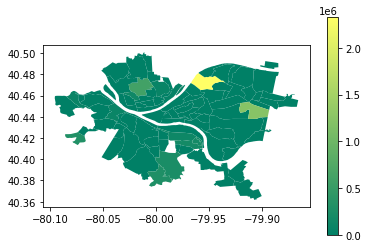

In [35]:
cem_area_map = neighbor.merge(neighbor_area, how='left', left_on='hood', right_on='hood')
cem_area_map.plot(column = 'cem_area', cmap = 'summer', legend = True)

Now we have a nice plot of all the neighborhoods and their cemetery area!

I wanted to show this as a bar graph as well...

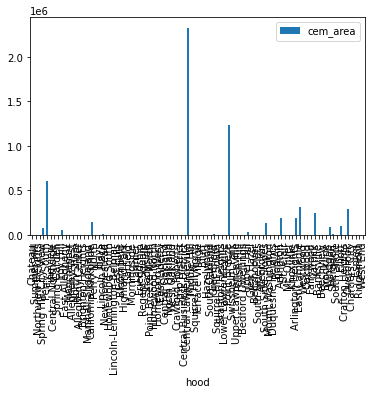

In [36]:
neighbor_area.plot.bar(rot = 90, x = 'hood')

In [37]:
neighbor_area_sorted = neighbor_area.sort_values('cem_area')

That bar graph looks a little messy, so I filtered it down to the top neighborhoods, and made it horizontal.

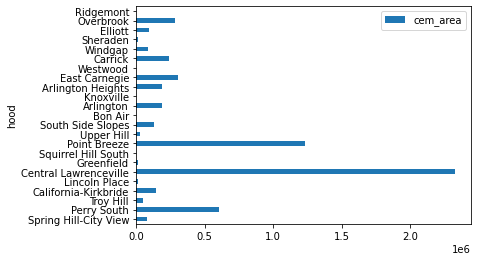

In [38]:
neighbor_area_top = neighbor_area[neighbor_area['cem_area']>0]
neighbor_area_top.plot.barh(x= 'hood')

So for cemeteries, Central Lawrenceville has the highest area, with Point Breeze coming in second, and Perry South in third.

# METRIC NUMBER 3: PRE1950s HOUSING!!!!! (MATT)

Ghosts are notorious for inhabiting dingy old houses, so for the last dataset we included the proportion of older houses in each respective Pittsburgh neighborhood. Mr. WPRDC-dataset-man defines older houses as anything built before the 1950s, so that's what we are going to roll with. We figure neighborhoods with a high amount of older houses are gonna be a good spot to bust some ghosts.

In [39]:
housing = pd.read_csv('housing.csv', sep=",")
housing

,TRACT,Pre1950
0,10300,0.658477
1,20100,0.321088
2,20300,0.724907
3,30500,0.324117
4,40200,0.463549
...,...,...
388,980000,0.353982
389,980100,0.000000
390,980700,0.619048
391,981100,0.000000


We start off by reading in the housing.csv, which contains our Pre1950s housing data. Unfortunately, it only comes with the census tract data and the proportions, AND it includes every neighborhood in Allegheny County, so I'm going to need to read in some more files in order to get to Pittsburgh Neighborhoods.

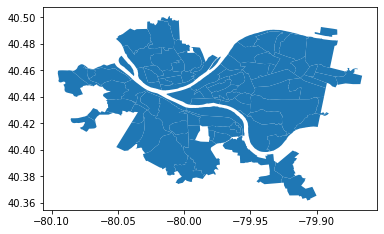

In [40]:
neighborhoods = geopandas.read_file("Neighborhoods_.shx")
neighborhoods.plot()

We're reading in our map of Pittsburgh, and displaying it to it's full glory.

In [41]:
hoods = pd.read_csv("Neighborhoods_.csv", sep=",")
hoods.iloc[0,4] = "260200"

Now it's time to read in the neighborhoods csv, to merge with the Pre1950s csv. I chose to do this with the CSV first and not the shape because I was getting some real strange errors trying to manipulate the .shp, which I had to do because Stephanie Joy Everett really dropped the ball and didn't include the Census tract data for Perry North. I had to find it myself and insert it into the dataframe in order for the whole operation to work.

In [42]:
hoods['tractce10'] = hoods['tractce10'].astype(int)
hoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1310,0,,,260200,,,,,,...,0.000000e+00,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,3.466740e+07,31289.384410
1,1339,25,42,003,10300,2,420030103002,Block Group 2,G5030,S,...,9.127700e+06,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,9.127072e+06,15724.430916
2,1334,6,42,003,20100,4,420030201004,Block Group 4,G5030,S,...,1.784669e+07,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.784589e+07,23034.972831
3,1333,5,42,003,20300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.694873e+07,24019.525964
4,1332,3,42,003,30500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,7.203337e+06,15697.914337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.068796e+07,19600.573085
86,1375,151,42,003,980700,1,420039807001,Block Group 1,G5030,S,...,5.905660e+06,15,Derek Dauphin,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,5.903800e+06,21342.948526
87,1308,240,42,003,980900,1,420039809001,Block Group 1,G5030,S,...,6.426351e+06,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,3.494916e+07,50372.656980
88,1335,15,42,003,981000,1,420039810001,Block Group 1,G5030,S,...,2.684846e+07,15,Andrea Lavin Kossis,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,2.684814e+07,25436.466636


The neighborhoods tractce10 data is all stored as a string, so I had to convert them all to int to match up with the older housing csv.

In [43]:
fiftys = hoods.merge(housing, how='left', left_on='tractce10', right_on='TRACT')
fiftys = fiftys[['hood', 'Pre1950']]
fiftys = fiftys.sort_values('Pre1950', ascending=False)
fiftys

,hood,Pre1950
31,Regent Square,0.915811
47,Central Northside,0.905109
26,Homewood North,0.880952
18,Upper Lawrenceville,0.855430
36,South Side Slopes,0.847349
...,...,...
71,Allegheny Center,0.173913
89,Point Breeze,0.000000
85,Chateau,NaN
87,Marshall-Shadeland,NaN


Here I did the big merge with the neighborhood data and Older Housing data, and then trimmed it down so that I had the only two things that I needed: the Pittsburgh Neighborhood name and the Pre1950s proportion. Note that the bottom three neighborhoods do not have any data for this dataset, later on we'll have to change those NaNs to 0 for the bigger merge with all the data, but I left it for now.

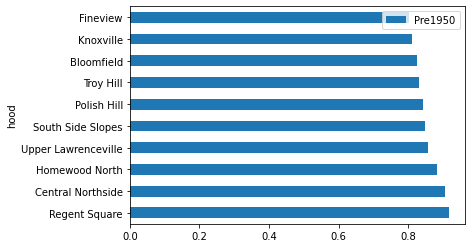

In [44]:
fiftys.head(10).plot.barh(x='hood')

I chose to display the top 10 proportions in a horizontal bar graph because it looks a lot cleaner, and you don't have to twist your neck in order to read all the values. But yeah here's the top 10, reading from the bottom at number 1 to the top at number 10.

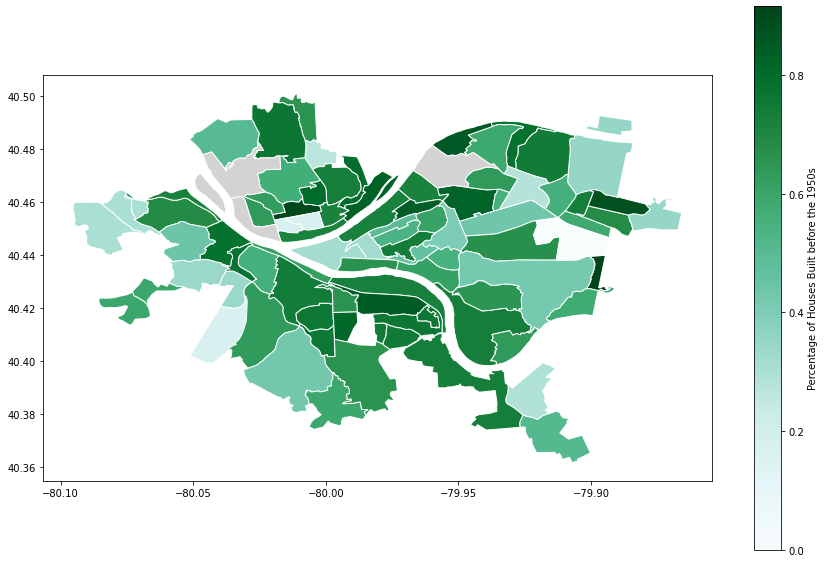

In [45]:
fiftysMap = neighborhoods.merge(fiftys, how = 'left', left_on='hood', right_on='hood')
fiftysMap.plot(column='Pre1950',
              cmap='BuGn',
              edgecolor='white',
              legend=True,
              legend_kwds={'label':'Percentage of Houses Built before the 1950s'},
              figsize=(15, 10),
              missing_kwds={'color': 'lightgrey'}
              )

And here's the map of all of the proportions. Regent Square seems to be our big winner, but wait! This is just the proportion of houses that are older. You would find the most ghosts in the neighborhood with the *most* older houses, so we're going to have to multiply each proportion by the total number of houses in each neighborhood.

In [46]:
fiftys.iloc[87, 1] = 0
fiftys.iloc[88, 1] = 0
fiftys.iloc[89, 1] = 0
fiftys.tail()

,hood,Pre1950
71,Allegheny Center,0.173913
89,Point Breeze,0.000000
85,Chateau,0.000000
87,Marshall-Shadeland,0.000000
88,Central Lawrenceville,0.000000


Changing those NaN values because now it's time for some calculations

In [49]:
population = pd.read_csv("pittsburghpopulation.csv", sep=',')
population

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Upper Lawrenceville,2669,2590,1754,751,10,37,1,37,79,...,-275,-324,264,-597,-5,37,-1,-22,49,-17
85,West End,254,235,135,95,0,2,0,3,19,...,-49,-55,-17,-45,1,4,2,0,6,10
86,West Oakland,2604,2558,1373,1003,7,169,0,6,46,...,-70,-103,159,-395,-1,28,2,104,33,51
87,Westwood,3066,2980,2535,250,3,174,1,17,86,...,266,167,-339,28,0,418,1,59,99,78


The WPRDC does not unfortunately have any data on the total number of houses per neighborhood, so I'm gonna have to do some estimations here. If we assume the average house has *roughly* 4 people (nuclear family), then we can take the total population per neighborhood and divide it by 4 to get the total number of houses.

In [50]:
fiftys = fiftys.merge(population, how='left', left_on='hood', right_on='Neighborhood')
fiftys = fiftys[['hood', 'Pre1950', '2010_Total_Population_x']]
fiftys.iloc[15,2] = 987
fiftys.iloc[16,2] = 1126
fiftys.iloc[76,2] = 3629
fiftys.iloc[24,2] = 2648
fiftys['Older Houses'] = fiftys['Pre1950'] * fiftys['2010_Total_Population_x'] / 4
fiftysHouses = fiftys[['hood', 'Older Houses']]
fiftysHouses =fiftysHouses.sort_values('Older Houses', ascending = False)
fiftysHouses.head(10)

,hood,Older Houses
36,Squirrel Hill North,1907.253983
7,Bloomfield,1741.797761
37,Carrick,1665.403784
22,Mount Washington,1632.256295
69,Squirrel Hill South,1602.883910
67,Shadyside,1524.092556
68,Brookline,1425.509802
45,Beechview,1269.365112
28,South Side Flats,1203.396703
41,Greenfield,1191.268844


Merging the two datasets together and filtering them down to what we need: neighborhoods and total number of houses. A couple neighborhoods had different variations of the same name between the two datasets, so I had to enter in those populations manually.
<br /> What was changed:
* Arlington Heights and Arlington were combined together. In order to fix this, I looked up the population of Arlington Heights, entered it in for Arlington Heights, and then subtracted that number from the total and entered the difference in as the population for Arlington
* Central Business District had the unhelpful description of (Downtown) added on to it's name for the population csv, so since it wouldn't merge I entered that population in manually
* Spring Hill City is called Spring Hill City View in the neighborhoods csv, so I did the same process as with Central Business District

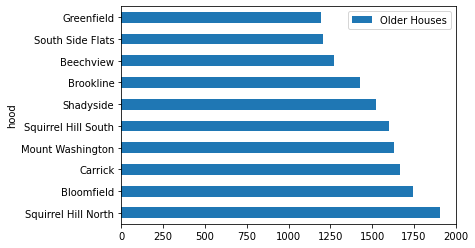

In [51]:
fiftysHouses.head(10).plot.barh(x='hood')

Again, here's a horizontal bar graph of the top ten by total number of older houses.
<br />Now it's time to graph the total number of houses. I'm going to use the same technique as when I plotted the proportions, by merging it to the blank neighborhoods map.

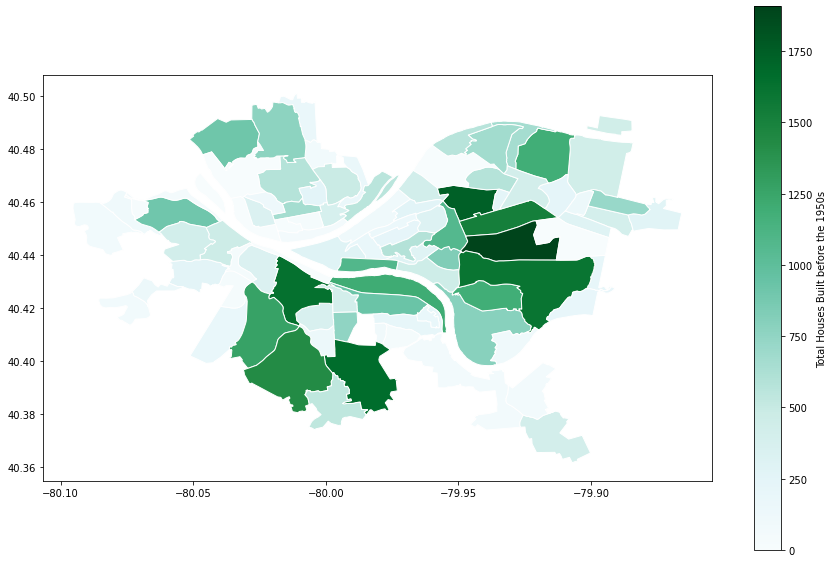

In [52]:
fiftysHousesMap = neighborhoods.merge(fiftysHouses, how = 'left', left_on='hood', right_on='hood')
fiftysHousesMap.plot(column='Older Houses',
              cmap='BuGn',
              edgecolor='white',
              legend=True,
              legend_kwds={'label':'Total Houses Built before the 1950s'},
              figsize=(15, 10)
              )

Here we have the map now of each neighborhood with their total number of Pre1950s houses. Swag.
<br />Now it is time to merge them all together 😈
# Part 4 - The Merge

In [53]:
d1 = fiftysHouses.merge(neighbor_area, how='left', left_on = 'hood', right_on='hood')
data = d1.merge(vacantAddresses, how='left', left_on='hood', right_on='hood')
data

,hood,Older Houses,cem_area,ResVac
0,Squirrel Hill North,1907.253983,0.000000e+00,5.0
1,Bloomfield,1741.797761,0.000000e+00,39.0
2,Carrick,1665.403784,2.385570e+05,110.0
3,Mount Washington,1632.256295,0.000000e+00,89.0
4,Squirrel Hill South,1602.883910,1.151995e+03,12.0
...,...,...,...,...
85,South Shore,2.940478,0.000000e+00,2.0
86,Point Breeze,0.000000,1.231335e+06,0.0
87,Chateau,0.000000,0.000000e+00,0.0
88,Marshall-Shadeland,0.000000,0.000000e+00,0.0


We merged all of the data into one big dataframe to use. It's still ordered in terms of Total Older Houses, but we'll get to that later

In [54]:
weightedData = data
weightedData['Older Houses'] = 950 * weightedData['Older Houses']
weightedData['cem_area'] = weightedData['cem_area'] * 1.25
weightedData['ResVac'] = 1495 * weightedData['ResVac']
weightedData['Total'] = weightedData.sum(axis=1)
weightedData = weightedData.sort_values('Total', ascending=False)
weightedData = weightedData.drop('Total', axis=1)

We figured a good metric to measure *everything* by was the square footage of each category, sort of like a "potentially haunted square feet per neighborhood" kind of deal. To find the total square footage, we looked up both the average square footage of a house built before the 1950s nationally (given a range of 700-1200, so we went in the middle with 950) and the average square footage of a Pittsburgh home, used for the vacancy data. 
<br />The cemetery data was already given in square feet, so that was nice, but since there are so many dead people in a cemetery we gave it a little extra weight of 1.25.
<br /> We made a temporary total column that is the sum of all the square footage, sorted descendingly by that column, and then removed it in order to sort our neighborhoods from most to least spooky. Now it's time to graph all our data:

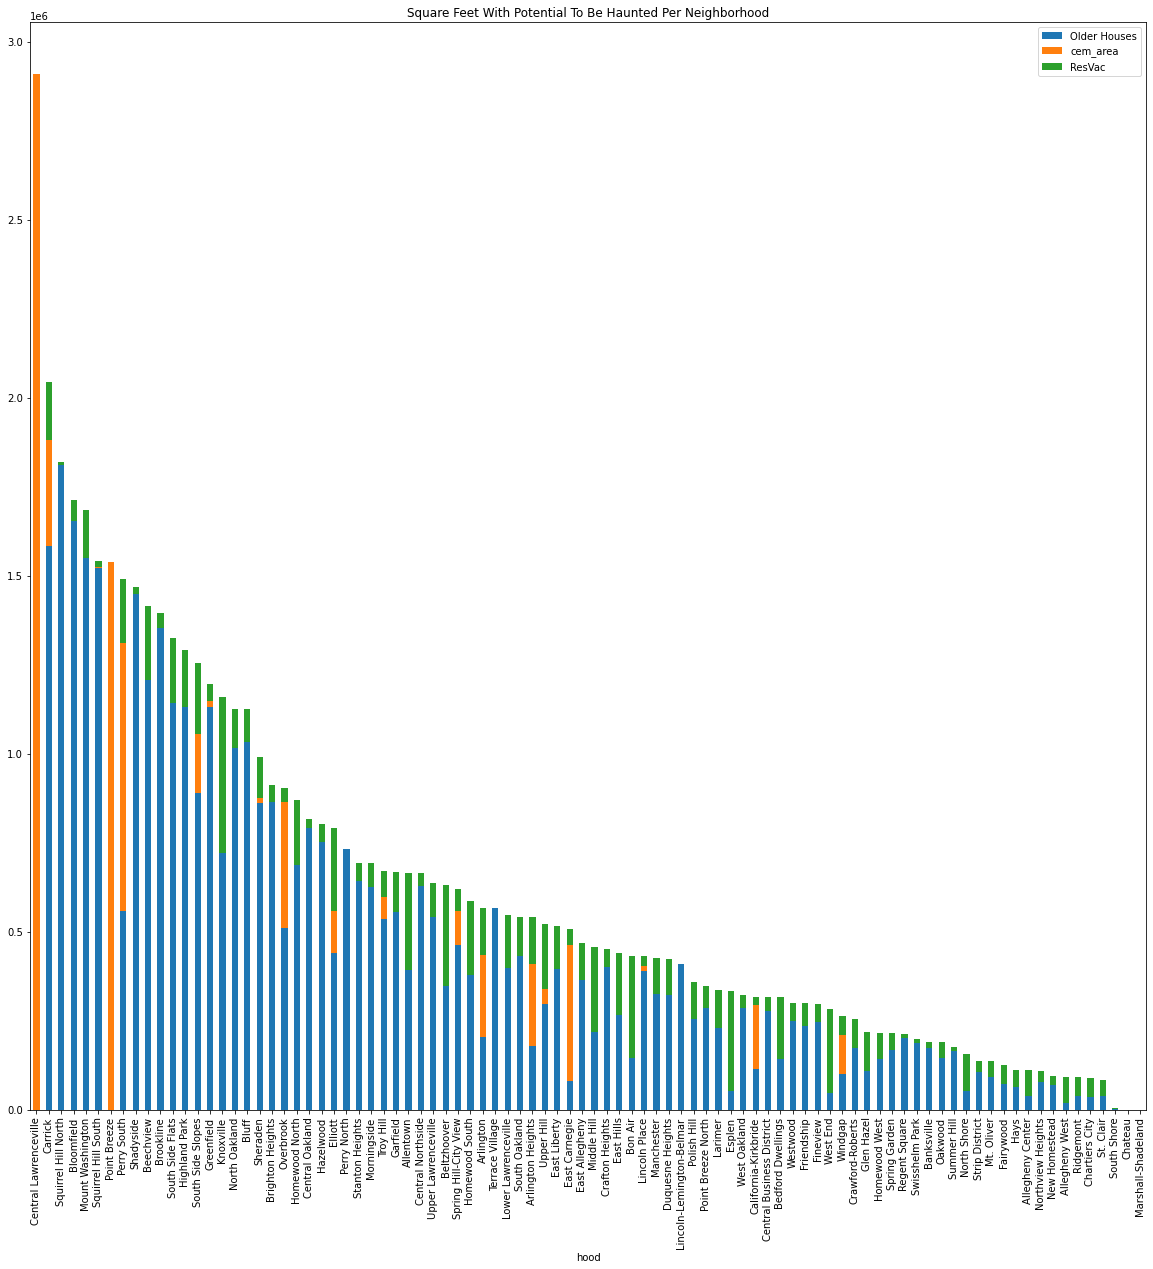

In [55]:
weightedData.plot.bar(x='hood', stacked=True, figsize = (20,20), title = "Square Feet With Potential To Be Haunted Per Neighborhood")

If you want to know the Top 5 without straining your neck:

In [56]:
weightedData.head()

,hood,Older Houses,cem_area,ResVac
89,Central Lawrenceville,0.000000e+00,2.908636e+06,0.0
2,Carrick,1.582134e+06,2.981962e+05,164450.0
0,Squirrel Hill North,1.811891e+06,0.000000e+00,7475.0
1,Bloomfield,1.654708e+06,0.000000e+00,58305.0
3,Mount Washington,1.550643e+06,0.000000e+00,133055.0


So there it is! The best neighborhood to hunt ghosts is Central Lawrenceville, due to its large square footage of cemeteries (it does have the Allegheny cemetery in it, so that makes sense)
<br /> Also important to remember is that there wasn't any data for the other two datasets for Central Lawrenceville, so it could still potentially have older and vacant houses.
<br /> But if you want a safer bet of all three categories for your neighborhood, the runner up was Carrick, and it has a pretty good mix of everything.

## Personal Conclusion:

Shiv - Out of the data that I was able to extract from the various datasets, it is clear that from a sheer volume of vacant addresses, Knoxville is the leading Pittsburgh neigborhood to be a Ghostbuster. My favorite neighborhood is East Liberty because the Target is convient.
<br />Julianne - From my data, Central Lawrenceville would be the best neighborhood as it has the biggest area of cemeteries. Personally, my favorite neighborhood might be Squirrel Hill because I really like the shops there. It did have a cemetery suprisingly, but, was no where near as large as Central Lawrenceville.
<br />Matt - My data points to Squirrel Hill North being the best neighborhood, with it having the highest number of old houses, however all the data combined results in either Central Lawrenceville or Carrick being the best neighborhood. This differs from my personal favorite neighborhood, Chateau, because it has the Carnegie Science Center which is a pretty dope building. It's not really a neighborhood in the traditional sense, with rows upon rows of houses, but it's listed as one in the WPRDC so I think it still counts.